# Data Activity Assignment: Spotter
## Download the csv file linked [here](https://rutgers.instructure.com/files/47566903/download?download_frd=1), then complete the notebook.

In [26]:
# Imports
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
from IPython.display import HTML
import matplotlib as mpl
from IPython.display import Video
import matplotlib.dates as mdates


%matplotlib inline

In [18]:
# Read in the data, then clean it up
data = pd.read_csv('SPOT-31522C_2024-03-25_2024-08-01_download.csv',
                   index_col=False,           
                   delimiter=',') 

# Convert Epoch Time to Datetime format
data['Time'] = pd.to_datetime(data['Epoch Time'],unit='s')

# Set new time as index and remove old time format
data = data.drop('Epoch Time', axis=1).set_index('Time').sort_index()

# Remove 1970
data = data[data.index.year != 1970]

# Replace dashes with NaNs
data = data.replace('-', np.nan)

# Convert column type from object to float
for col in data.select_dtypes(include='object').columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
print(data.keys())

Index(['Battery Voltage (V)', 'Power (W)', 'Humidity (%rel)',
       'Significant Wave Height (m)', 'Peak Period (s)', 'Mean Period (s)',
       'Peak Direction (deg)', 'Peak Directional Spread (deg)',
       'Mean Direction (deg)', 'Mean Directional Spread (deg)',
       'Latitude (deg)', 'Longitude (deg)', 'f', 'df', 'a1', 'b1', 'a2', 'b2',
       'varianceDensity', 'direction', 'directionalSpread', 'Wind Speed (m/s)',
       'Wind Direction (deg)', 'Surface Temperature (°C)',
       'Partition0 Start Frequency (hz)', 'Partition0 End Frequency (hz)',
       'Partition0 Significant Wave Height (m)', 'Partition0 Mean Period (s)',
       'Partition0 Mean Direction (deg)',
       'Partition0 Mean Directional Spread (deg)',
       'Partition1 Start Frequency (hz)', 'Partition1 End Frequency (hz)',
       'Partition1 Significant Wave Height (m)', 'Partition1 Mean Period (s)',
       'Partition1 Mean Direction (deg)',
       'Partition1 Mean Directional Spread (deg)',
       'Mean Barometri

In [19]:
data

,Battery Voltage (V),Power (W),Humidity (%rel),Significant Wave Height (m),Peak Period (s),Mean Period (s),Peak Direction (deg),Peak Directional Spread (deg),Mean Direction (deg),Mean Directional Spread (deg),...,Partition0 Mean Direction (deg),Partition0 Mean Directional Spread (deg),Partition1 Start Frequency (hz),Partition1 End Frequency (hz),Partition1 Significant Wave Height (m),Partition1 Mean Period (s),Partition1 Mean Direction (deg),Partition1 Mean Directional Spread (deg),Mean Barometric Pressure (hPa),Processing Source
Time,,,,,,,,,,,,,,,,,,,,,
2024-03-25 16:05:00,3.99,0.64,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.12,NaN
2024-03-25 16:10:00,3.99,0.64,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.10,NaN
2024-03-25 16:15:00,3.99,0.64,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.08,NaN
2024-03-25 16:20:00,3.99,0.74,0.80,0.170,12.800,9.240,15.038,72.318,249.444,79.663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-25 16:20:00,3.99,0.64,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-11 19:50:00,4.05,0.00,-1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.94,NaN
2024-05-11 19:55:00,4.05,0.00,-1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.93,NaN
2024-05-11 19:55:00,4.04,0.01,0.00,0.050,25.600,5.360,340.017,78.198,344.219,79.113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <font color='red'>Assignment: All figures should be polished, with axes, labels, legend(s), colorbar(s), etc.</font>

# #1. Make a map plot with marker color indicating time.

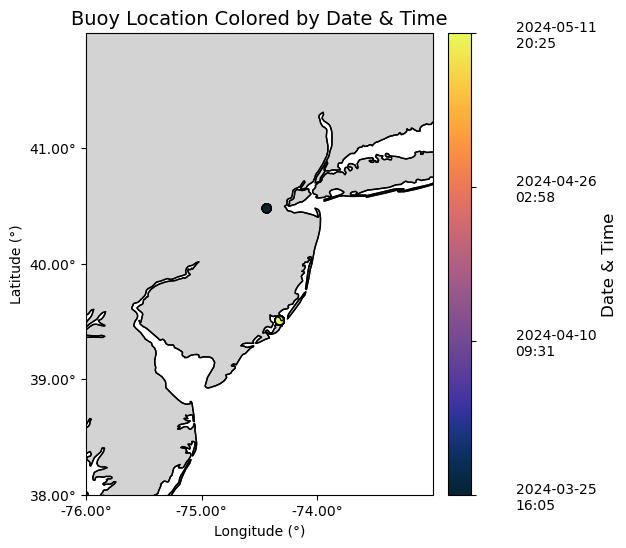

In [34]:
# Convert datetime index to Matplotlib’s internal date format
time_numeric = mdates.date2num(data.index)

# Define broader tick ranges (rounded values for full coverage)
lon_min, lon_max = np.floor(data["Longitude (deg)"].min()) - 1, np.ceil(data["Longitude (deg)"].max()) + 1
lat_min, lat_max = np.floor(data["Latitude (deg)"].min()) - 1, np.ceil(data["Latitude (deg)"].max()) + 1

# Define standard intervals for lat/lon ticks
lon_ticks = np.arange(lon_min, lon_max, 1.0)  # Adjust step size as needed
lat_ticks = np.arange(lat_min, lat_max, 1.0)  # Adjust step size as needed

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Scatter plot of buoy locations, colored by datetime
sc = ax.scatter(data["Longitude (deg)"], data["Latitude (deg)"], 
                c=time_numeric, cmap="cmo.thermal", edgecolors="black", s=40, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Date & Time", fontsize=12)

# Select exactly four evenly spaced time values
tick_locs = np.linspace(time_numeric.min(), time_numeric.max(), 4)
cbar.set_ticks(tick_locs)

# Format the colorbar to show readable datetime labels
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

# Offset colorbar labels to the right
for label in cbar.ax.get_yticklabels():
    label.set_ha("left")  # Align labels to the left
    label.set_position((2.5, 0))  # Shift labels slightly right

# Set latitude and longitude ticks for the entire area
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Format axis labels to show degrees (°)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}°"))

# Add labels
ax.set_title("Buoy Location Colored by Date & Time", fontsize=14)
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

plt.show()

# #2. Make a single 7x2 figure with subplots of the following: 
- Battery Voltage (V)
- Power (W)
- Humidity (%rel)
- Significant Wave Height (m)
- Peak Period (s)
- Mean Period (s)
- Peak Direction (deg)
- Peak Directional Spread (deg)
- Mean Direction (deg)
- Mean Directional Spread (deg)
- Latitude (deg)
- Longitude (deg)
- Mean Barometric Pressure (hPa)
- Wind [quiver](https://stackoverflow.com/questions/74043447/plotting-wind-speed-and-direction-like-example-plot-shown-here-in-python) (speed & direction) time series

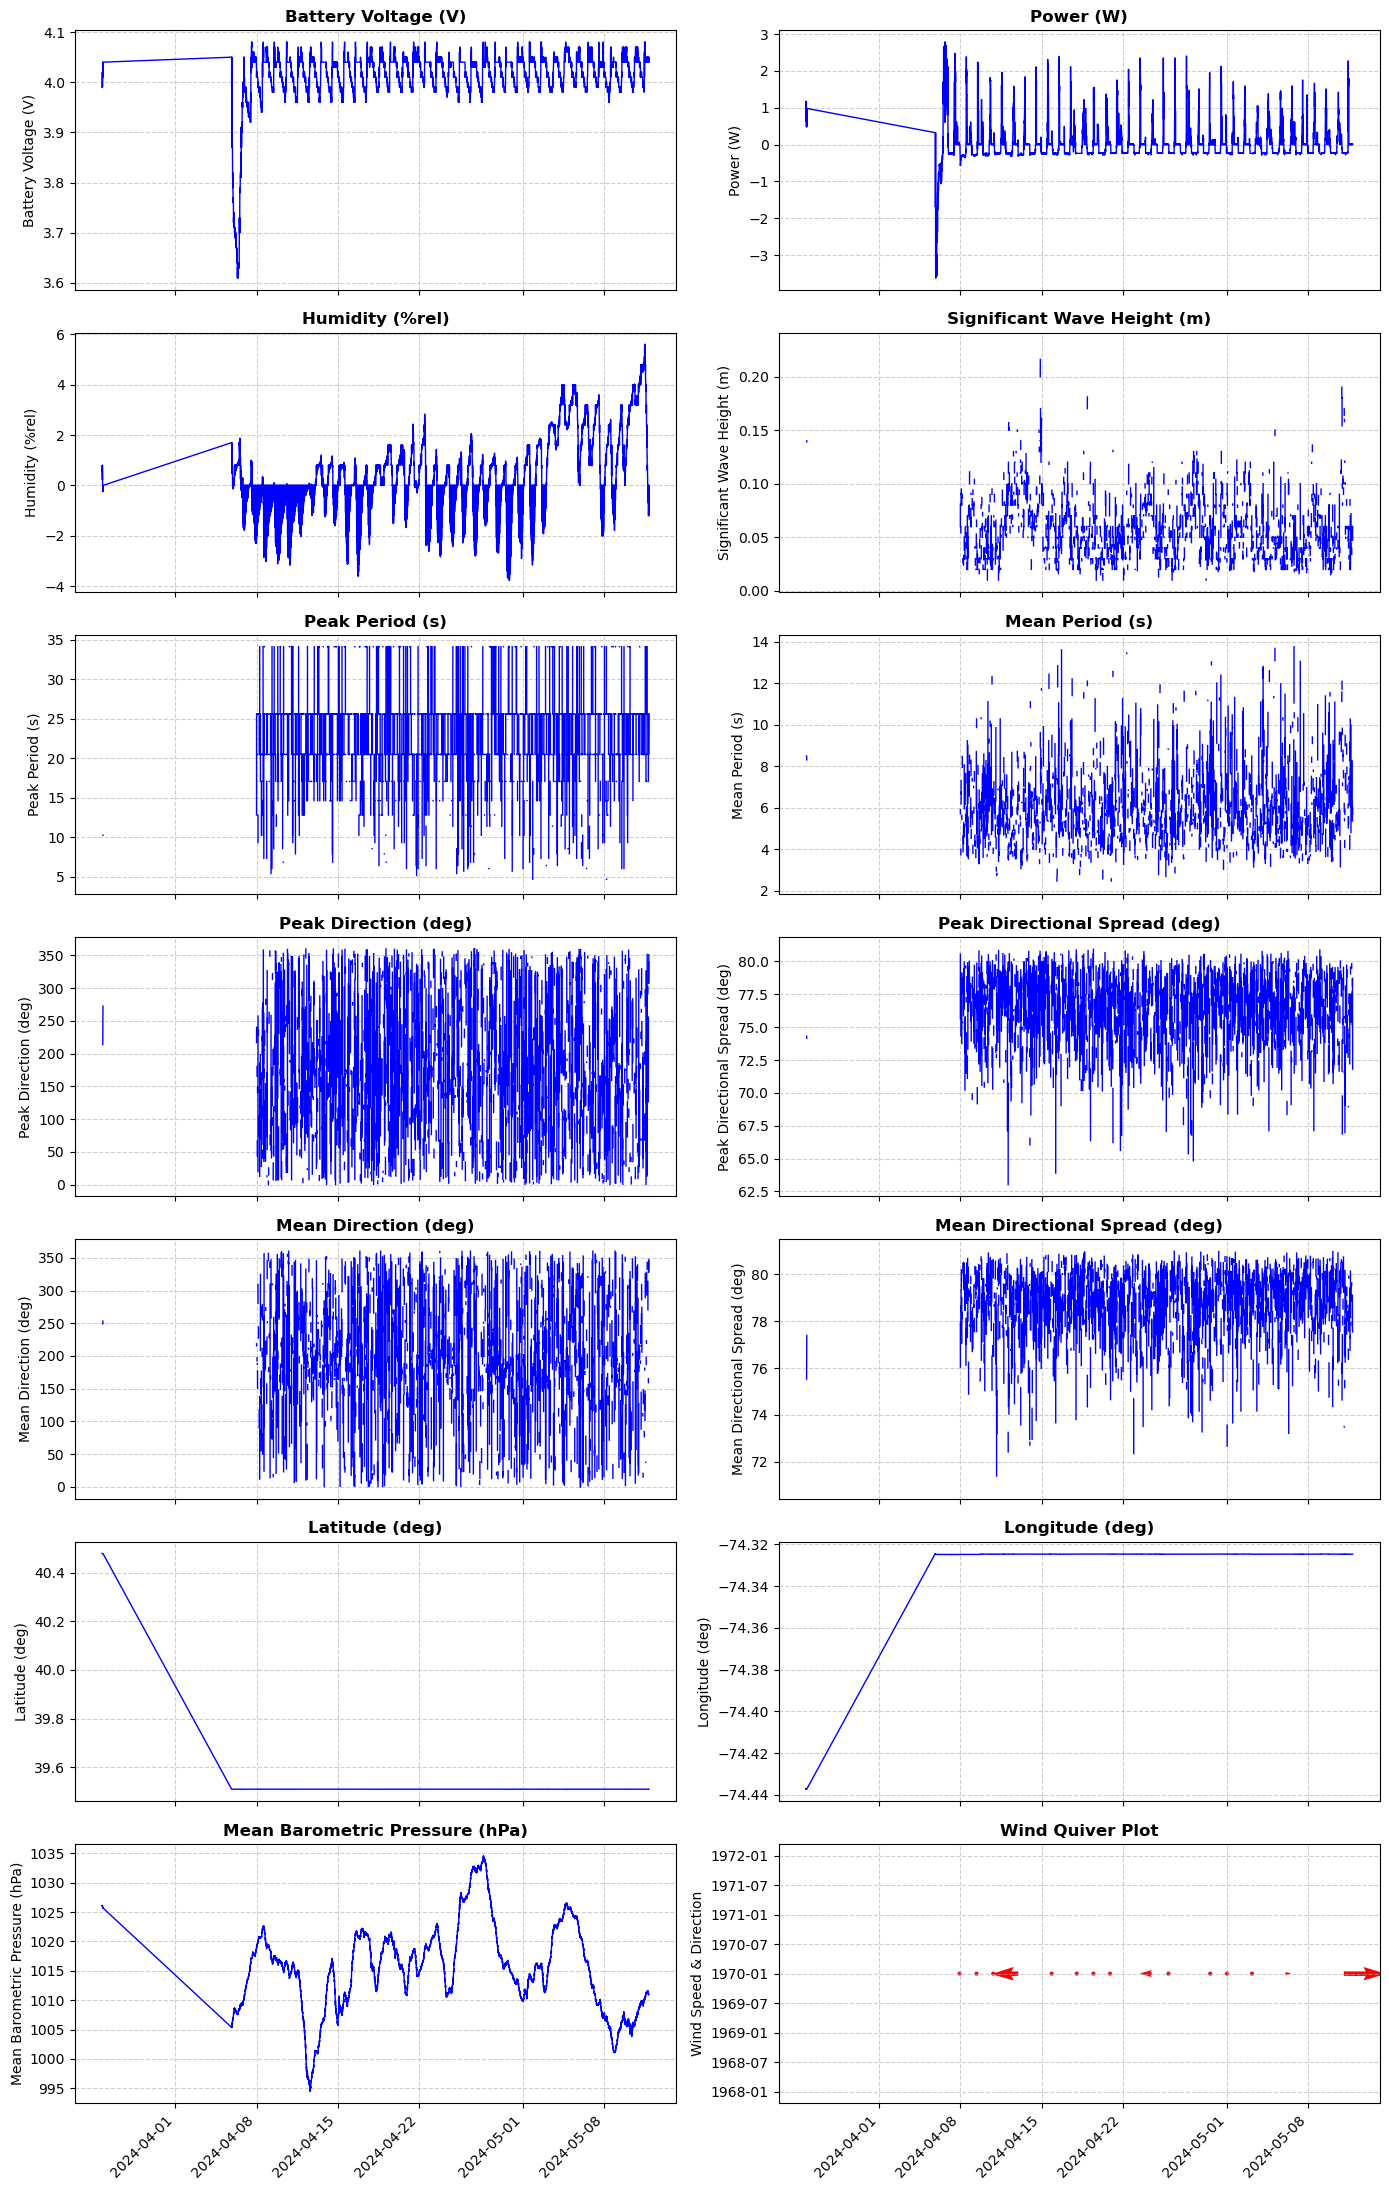

In [36]:
#VAR
variables = [
    "Battery Voltage (V)", "Power (W)", "Humidity (%rel)", 
    "Significant Wave Height (m)", "Peak Period (s)", "Mean Period (s)",
    "Peak Direction (deg)", "Peak Directional Spread (deg)", "Mean Direction (deg)",
    "Mean Directional Spread (deg)", "Latitude (deg)", "Longitude (deg)", 
    "Mean Barometric Pressure (hPa)"
]


# Create figure with 7 rows, 2 columns
fig, axes = plt.subplots(7, 2, figsize=(14, 22), sharex=True)
axes = axes.flatten()  # Flatten to loop through easily

# Plot each variable as a time series
for i, var in enumerate(variables):
    ax = axes[i]
    ax.plot(data.index, data[var], label=var, color='b', linewidth=1)
    ax.set_ylabel(var, fontsize=10)
    ax.set_title(var, fontsize=12, fontweight="bold")  # Add title
    ax.grid(True, linestyle='--', alpha=0.6)

# Wind quiver plot (last subplot)
ax_quiver = axes[-1]
wind_speed = data["Wind Speed (m/s)"]
wind_direction = np.deg2rad(data["Wind Direction (deg)"])  # Convert to radians

# Define quiver frequency (not every point to avoid overcrowding)
quiver_step = max(1, len(data) // 50)  # Adjusted to plot ~50 arrows
time_subset = data.index[::quiver_step]
speed_subset = wind_speed[::quiver_step]
direction_subset = wind_direction[::quiver_step]

# Create quiver plot
ax_quiver.quiver(time_subset, np.zeros_like(time_subset), 
                 np.cos(direction_subset) * speed_subset, np.sin(direction_subset) * speed_subset, 
                 angles='xy', scale_units='xy', scale=1, color='r')

ax_quiver.set_ylabel("Wind Speed & Direction")
ax_quiver.set_title("Wind Quiver Plot", fontsize=12, fontweight="bold")  # Add title
ax_quiver.grid(True, linestyle='--', alpha=0.6)

# Format x-axis (date formatting)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")

# Adjust layout
plt.tight_layout()
plt.show()


# #3. Describe the above figure. Describe every trends/signal/pattern you can identify in the different time series, and highlight any relations between subplot data.

Power and battery show fairly consistent readings with only an initial drop between the 1st and the 8th. Humidiity has a slight increase during this time. Significant Wave Height (m), Peak Period (s), Mean Period (s),Peak Direction (deg), Peak Directional Spread (deg), Mean Direction (deg), Mean Directional Spread (deg) all show a similar trend where there is a breife point of data before the first a large cut off then the dat is shown. For the Latitude (deg) and Longitude (deg) they start at one locarion before the first then change before the 8th and hold at that new location. Mean Barometric Pressure (hPa), shows a decrease from the 1st to before the 8th like the other plots but flucates for the rest of its time. Wind quiver (speed & direction) only has readings starting from right before the 8th. These changes are due to the change in testing sites. There is minimal data from the test near central jersey (Rutgers Wet Tank) to when it was ran by Tuckerton. The 8 plots within the middle show flucuation over time with humidity showing a noticeable increase towards the end of the time series. 

# #4. Create a [windrose](https://github.com/python-windrose/windrose) of the wind data.

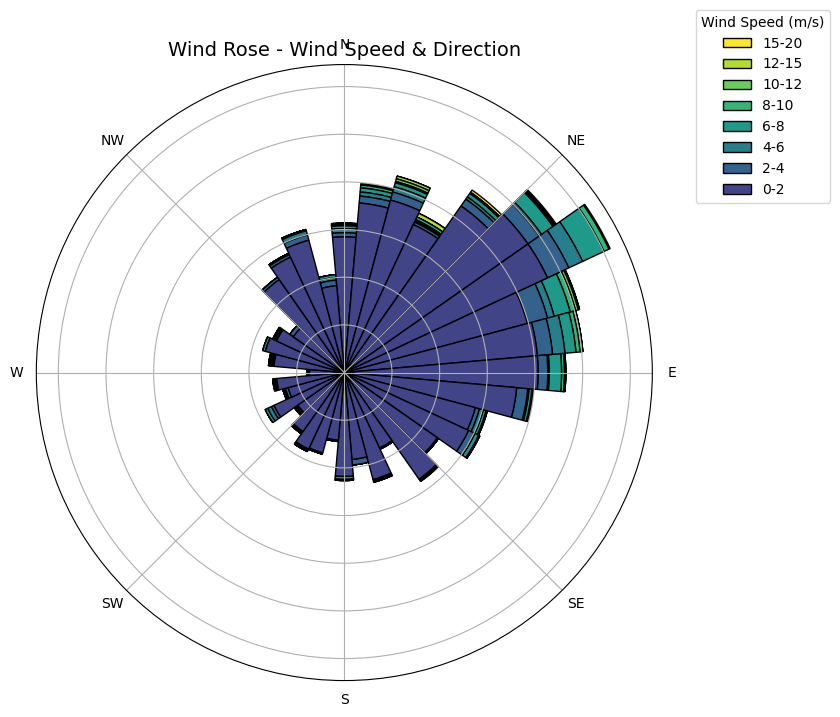

In [37]:
from math import radians

# Load wind speed and direction
wind_speed = data["Wind Speed (m/s)"]
wind_direction = data["Wind Direction (deg)"]

# Remove NaN values (important for polar plot)
valid_mask = ~np.isnan(wind_speed) & ~np.isnan(wind_direction)
wind_speed = wind_speed[valid_mask]
wind_direction = wind_direction[valid_mask]

# Convert direction to radians for polar plotting
wind_direction_rad = np.deg2rad(wind_direction)

# Define wind speed bins (categories)
speed_bins = [0, 2, 4, 6, 8, 10, 12, 15, 20]  # Adjust as needed
speed_labels = ["0-2", "2-4", "4-6", "6-8", "8-10", "10-12", "12-15", "15-20"]

# Categorize wind speeds into bins
wind_speed_binned = np.digitize(wind_speed, speed_bins) - 1  # Get bin indices

# Count occurrences for each bin/direction combination
num_bins = 36  # Divide into 10-degree bins (adjust if needed)
theta_bins = np.linspace(0, 2 * np.pi, num_bins + 1)  # Angle bins
hist = np.zeros((len(speed_bins) - 1, num_bins))

# Populate histogram
for i in range(len(wind_speed)):
    direction_idx = np.digitize(wind_direction_rad[i], theta_bins) - 1
    speed_idx = wind_speed_binned[i]
    if 0 <= direction_idx < num_bins and 0 <= speed_idx < len(speed_bins) - 1:
        hist[speed_idx, direction_idx] += 1

# Normalize histogram for better visualization
hist = hist / hist.sum()

# Create wind rose plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Define color map
colors = plt.cm.viridis(np.linspace(0.2, 1, len(speed_bins) - 1))

# Plot each wind speed bin as a stacked bar
for i in range(len(speed_bins) - 2, -1, -1):  # Reverse for proper stacking
    ax.bar(theta_bins[:-1], hist[i], width=(2 * np.pi / num_bins), bottom=hist[:i].sum(axis=0),
           color=colors[i], edgecolor='k', label=speed_labels[i])

# Format plot
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
ax.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])
ax.set_yticklabels([])
ax.set_title("Wind Rose - Wind Speed & Direction", fontsize=14)

# Add legend
plt.legend(title="Wind Speed (m/s)", loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()

# #5. Describe the above figure.

The windrose plot is useful in showing the wind speed and direction from the devices origin. With the buoy being in the center of the plot and the wind recordings originating from the center. This figure is useful and very descriptive in finding out how the wind in a certain area is over a set time. This figure also shows the percentage/average direction of wind for thetime series. For this study the winds were more prevelant blowing from the East to North east direction.

# <font color='green'>Extra Credit (10 pts = 20%). Use Sofar's [spotter-sd-parser.py](https://github.com/sofarocean/spotter-sd-parser) to convert the data from Thursday's brief Passion Puddle deployment, then load in, clean up, plot, and describe the data.</font>